## Data Generation

In [1]:
from data_gen import synthetic_dataset_non_linear, synthetic_dataset_linear
import pandas as pd
import math
import matplotlib.pyplot as plt

### Linear Dataset

This simulate a very simple scenario in which the hidden confounder is one dimensional with distribution
$$
Z \sim \mathcal{N}(0,1)
$$
and the proxies from which we study the confounder
$$
X_j \sim \mathcal{N}(a_j z,\sigma_X^2)\,,\quad a_j \sim \mathcal{U}_{[-10,10]}
$$
finally the treatment and the outcome are
$$
T|Z=z \sim \text{Bernoulli}(\sigma(\beta z))
$$
$$
Y|Z=z,T=t \sim \mathcal{N}(z + t, \sigma_Y^2)

In [2]:
num_proxies = 10

linear_dataset = synthetic_dataset_linear(
    n = 1000,
    beta = 1.0,
    num_proxies = num_proxies,
    shuffle_pct = 0.0,
    sigma_x = 1.0,
    sigma_y = 1.0,
    seed = 0
)
x = linear_dataset['x']
y = linear_dataset['y']
t = linear_dataset['t']
z = linear_dataset['z']
ite = linear_dataset['ite']

### Proxies Histograms

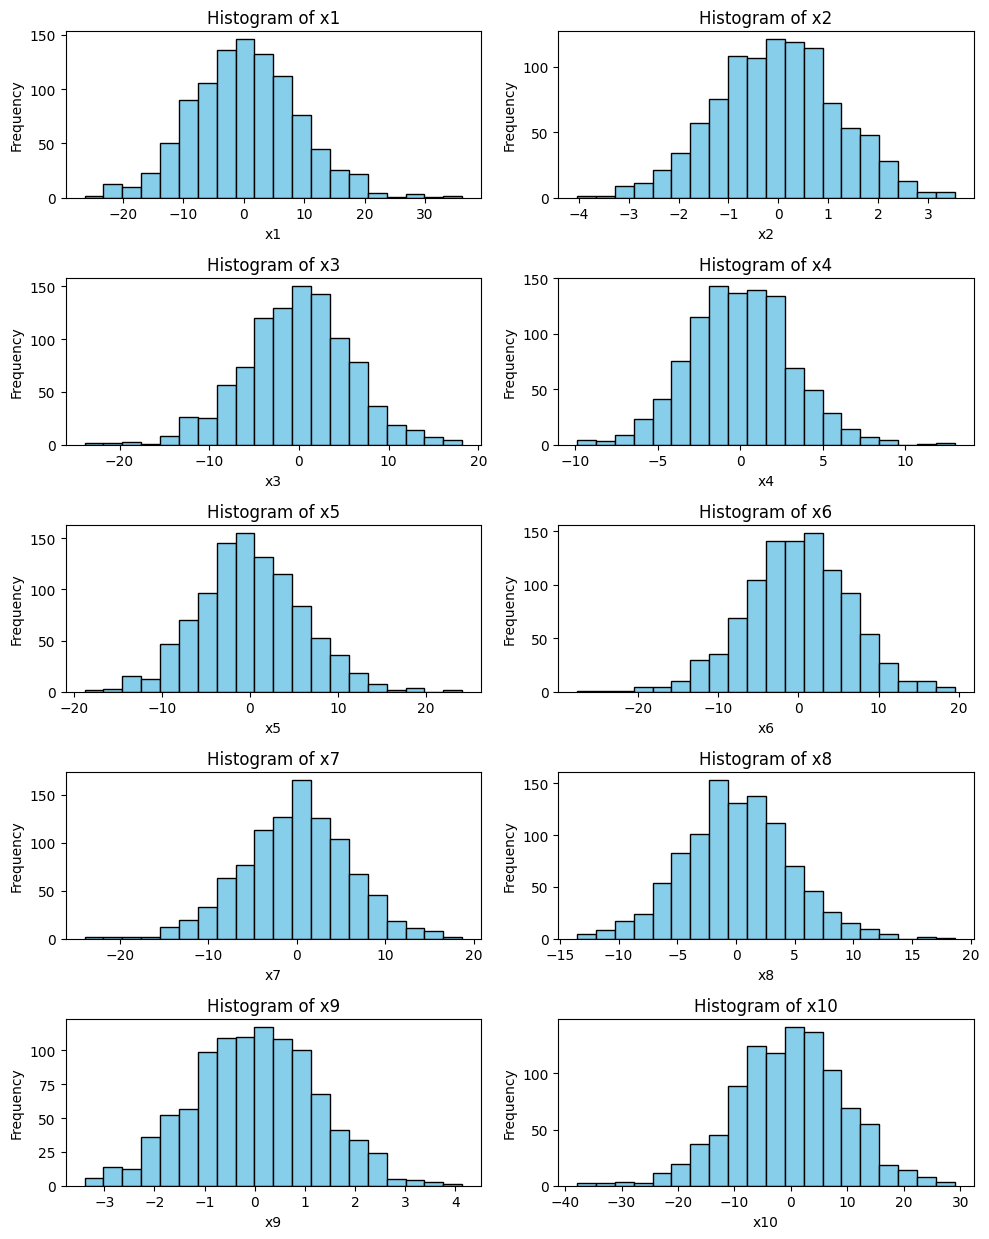

In [3]:
ncols = 2
nrows = math.ceil(num_proxies / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(10, 2.5 * nrows))
axes = axes.flatten()

for idx in range(num_proxies):
    ax = axes[idx]
    ax.hist(x[:, idx].numpy(), bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of x{idx+1}')
    ax.set_xlabel(f'x{idx+1}')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for idx in range(num_proxies, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

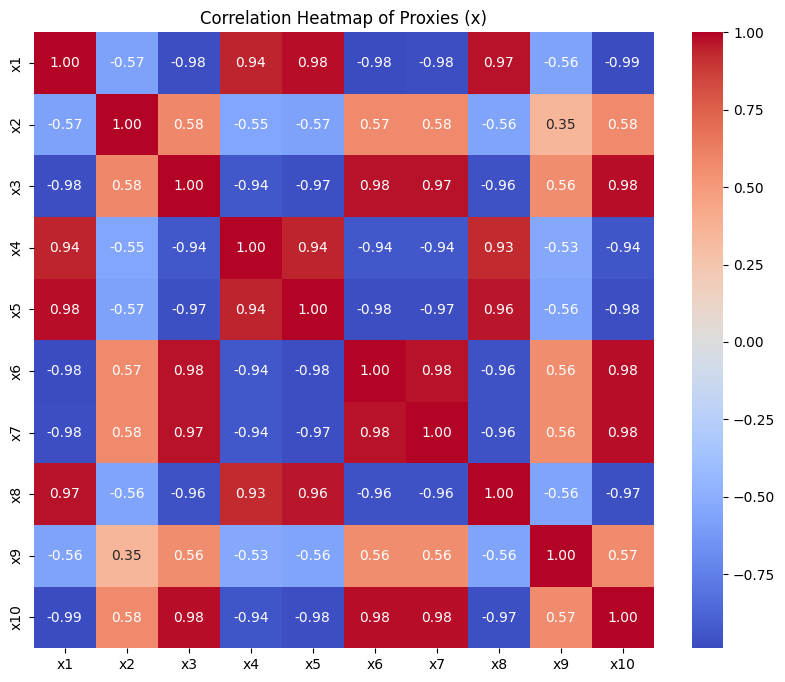

In [4]:
import seaborn as sns

# Convert x to a pandas DataFrame for correlation calculation
x_df = pd.DataFrame(x.numpy(), columns=[f'x{i+1}' for i in range(x.shape[1])])
corr_matrix = x_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Proxies (x)')
plt.show()

In [15]:
num_proxies = 10

linear_dataset = synthetic_dataset_linear(
    n = 1000,
    beta = 1.0,
    num_proxies = num_proxies,
    shuffle_pct = 0.5,
    sigma_x = 1.0,
    sigma_y = 1.0,
    seed = 0
)
x = linear_dataset['x']
y = linear_dataset['y']
t = linear_dataset['t']
z = linear_dataset['z']
ite = linear_dataset['ite']

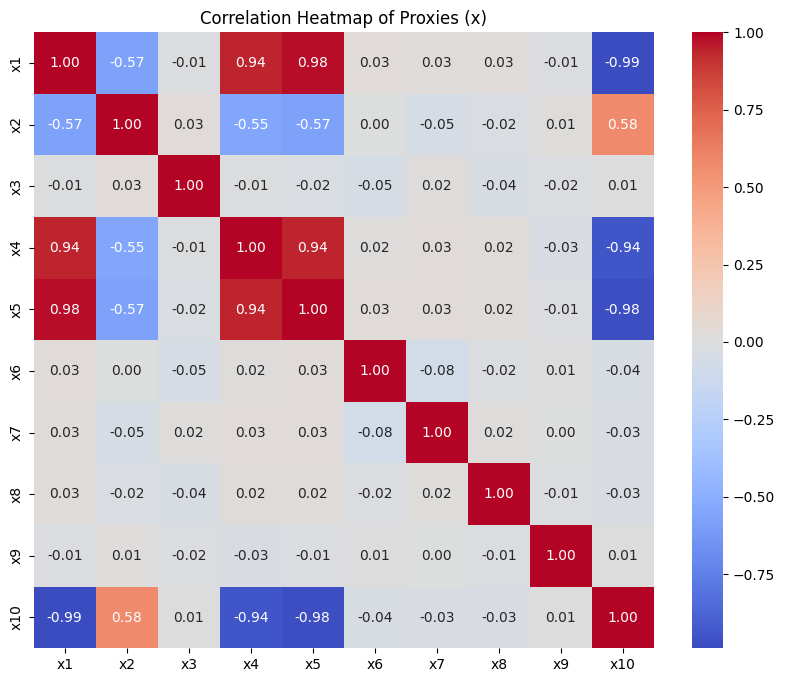

In [16]:
import seaborn as sns

# Convert x to a pandas DataFrame for correlation calculation
x_df = pd.DataFrame(x.numpy(), columns=[f'x{i+1}' for i in range(x.shape[1])])
corr_matrix = x_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Proxies (x)')
plt.show()

### Non Linear Dataset

Keeping the notation of the previous dataset:
$$
Z\sim\mathcal{N}(0,1)\quad \text{or} \\
Z\sim\frac12\mathcal{N}(-2,1)+\frac12\mathcal{N}(2,1)\quad \text{or} \\
Z \sim\text{Lognormal}(0,1)
$$

$$
X_1,...,X_d \sim \mathcal{N}(a\tanh(z),\Sigma)\quad \Sigma=\sigma_X^2[(1-\rho) I+\rho11^T]
$$

$$
T|Z\sim\text{Bernoulli}(\sigma(\beta z))
$$

$$
Y|Z,T\sim \mathcal{N}\left(\sin(z)+\frac12z+t\left(1+\frac12t\right),\sigma_Y^2\right)
$$


No correlation between the proxies $X_j$ apart from the one deriving from $Z$

In [17]:
num_proxies = 10

non_linear_dataset = synthetic_dataset_non_linear(
    n = 2000,
    beta = 2.0,
    num_proxies = 10,
    shuffle_pct = 0.0,
    prior_type = "gaussian",
    sigma_x = 1.0,
    sigma_y = 1.0,
    rho = 0.0,   
    seed = 0,
)

x = non_linear_dataset['x']
y = non_linear_dataset['y']
t = non_linear_dataset['t']
z = non_linear_dataset['z']
ite = non_linear_dataset['ite']

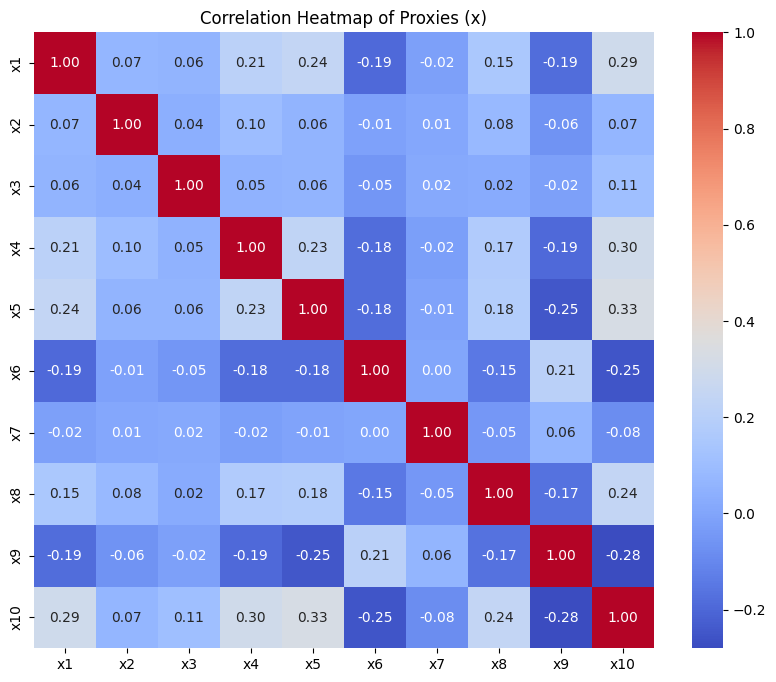

In [18]:
# Convert x to a pandas DataFrame for correlation calculation
x_df = pd.DataFrame(x.numpy(), columns=[f'x{i+1}' for i in range(x.shape[1])])
corr_matrix = x_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Proxies (x)')
plt.show()

Introducing correlation in the off diagonal terms $\rho=0.9$. This correlation is now not through $Z$ but just on the $X_j$ noise

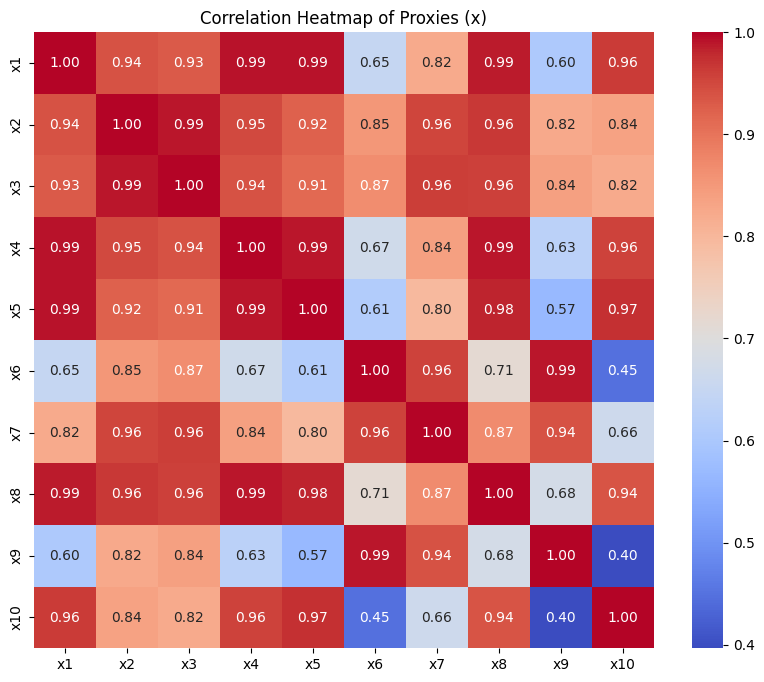

In [25]:
num_proxies = 10

non_linear_dataset = synthetic_dataset_non_linear(
    n = 2000,
    beta = 2.0,
    num_proxies = 10,
    shuffle_pct = 0.0,
    prior_type = "gaussian",
    sigma_x = 1.0,
    sigma_y = 1.0,
    rho = 0.99,   
    seed = 0,
)

x = non_linear_dataset['x']
y = non_linear_dataset['y']
t = non_linear_dataset['t']
z = non_linear_dataset['z']
ite = non_linear_dataset['ite']
# Convert x to a pandas DataFrame for correlation calculation
x_df = pd.DataFrame(x.numpy(), columns=[f'x{i+1}' for i in range(x.shape[1])])
corr_matrix = x_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Proxies (x)')
plt.show()

#### Shouffling

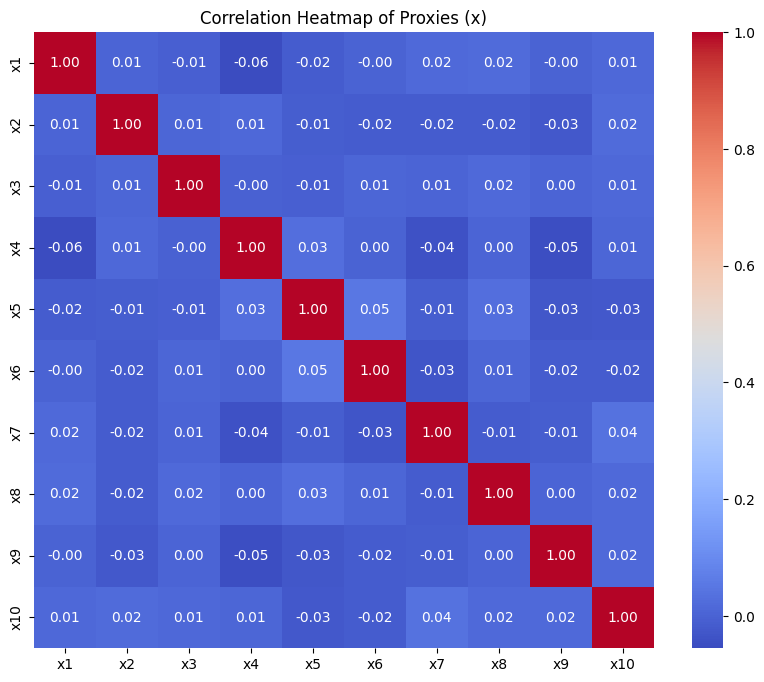

In [28]:
num_proxies = 10

non_linear_dataset = synthetic_dataset_non_linear(
    n = 2000,
    beta = 2.0,
    num_proxies = 10,
    shuffle_pct = 1.0,
    prior_type = "gaussian",
    sigma_x = 1.0,
    sigma_y = 1.0,
    rho = 0.0,   
    seed = 0,
)

x = non_linear_dataset['x']
y = non_linear_dataset['y']
t = non_linear_dataset['t']
z = non_linear_dataset['z']
ite = non_linear_dataset['ite']
# Convert x to a pandas DataFrame for correlation calculation
x_df = pd.DataFrame(x.numpy(), columns=[f'x{i+1}' for i in range(x.shape[1])])
corr_matrix = x_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Proxies (x)')
plt.show()

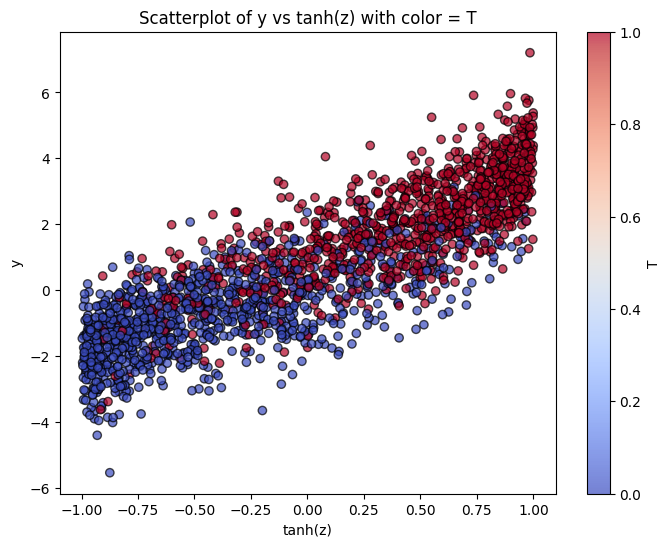

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Compute tanh(z)
tanh_z = np.tanh(z.numpy())

# Create scatterplot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tanh_z, y.numpy(), c=t.numpy(), cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='T')
plt.xlabel('tanh(z)')
plt.ylabel('y')
plt.title('Scatterplot of y vs tanh(z) with color = T')
plt.show()

#### Increasing the confounding strenght

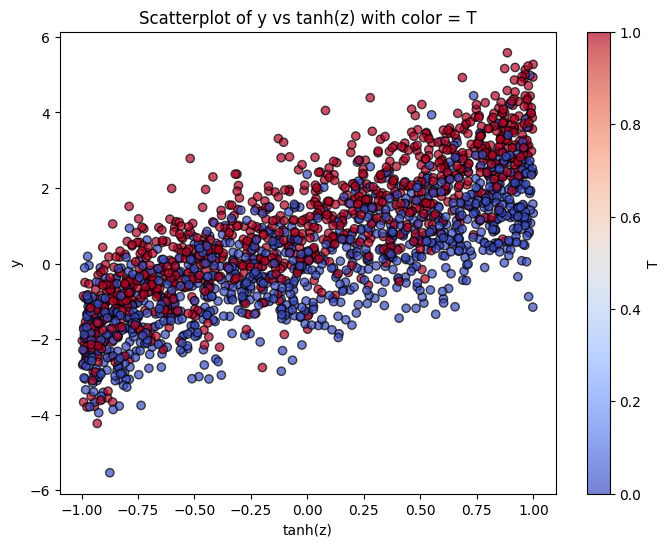

In [36]:
num_proxies = 10

non_linear_dataset = synthetic_dataset_non_linear(
    n = 2000,
    beta = 0.0,
    num_proxies = 10,
    shuffle_pct = 1.0,
    prior_type = "gaussian",
    sigma_x = 1.0,
    sigma_y = 1.0,
    rho = 0.0,   
    seed = 0,
)

x = non_linear_dataset['x']
y = non_linear_dataset['y']
t = non_linear_dataset['t']
z = non_linear_dataset['z']
ite = non_linear_dataset['ite']

tanh_z = np.tanh(z.numpy())

# Create scatterplot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tanh_z, y.numpy(), c=t.numpy(), cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='T')
plt.xlabel('tanh(z)')
plt.ylabel('y')
plt.title('Scatterplot of y vs tanh(z) with color = T')
plt.show()

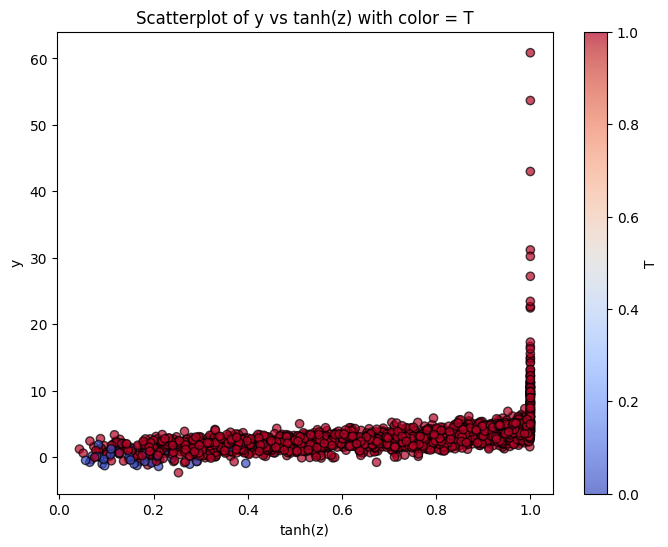

In [45]:
num_proxies = 10

non_linear_dataset = synthetic_dataset_non_linear(
    n = 2000,
    beta = 10.0,
    num_proxies = 10,
    shuffle_pct = 1.0,
    prior_type = "lognormal",
    sigma_x = 1.0,
    sigma_y = 1.0,
    rho = 0.0,   
    seed = 0,
)

x = non_linear_dataset['x']
y = non_linear_dataset['y']
t = non_linear_dataset['t']
z = non_linear_dataset['z']
ite = non_linear_dataset['ite']

tanh_z = np.tanh(z.numpy())

# Create scatterplot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tanh_z, y.numpy(), c=t.numpy(), cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='T')
plt.xlabel('tanh(z)')
plt.ylabel('y')
plt.title('Scatterplot of y vs tanh(z) with color = T')
plt.show()

### Outcome as Viewed from the Proxies POV

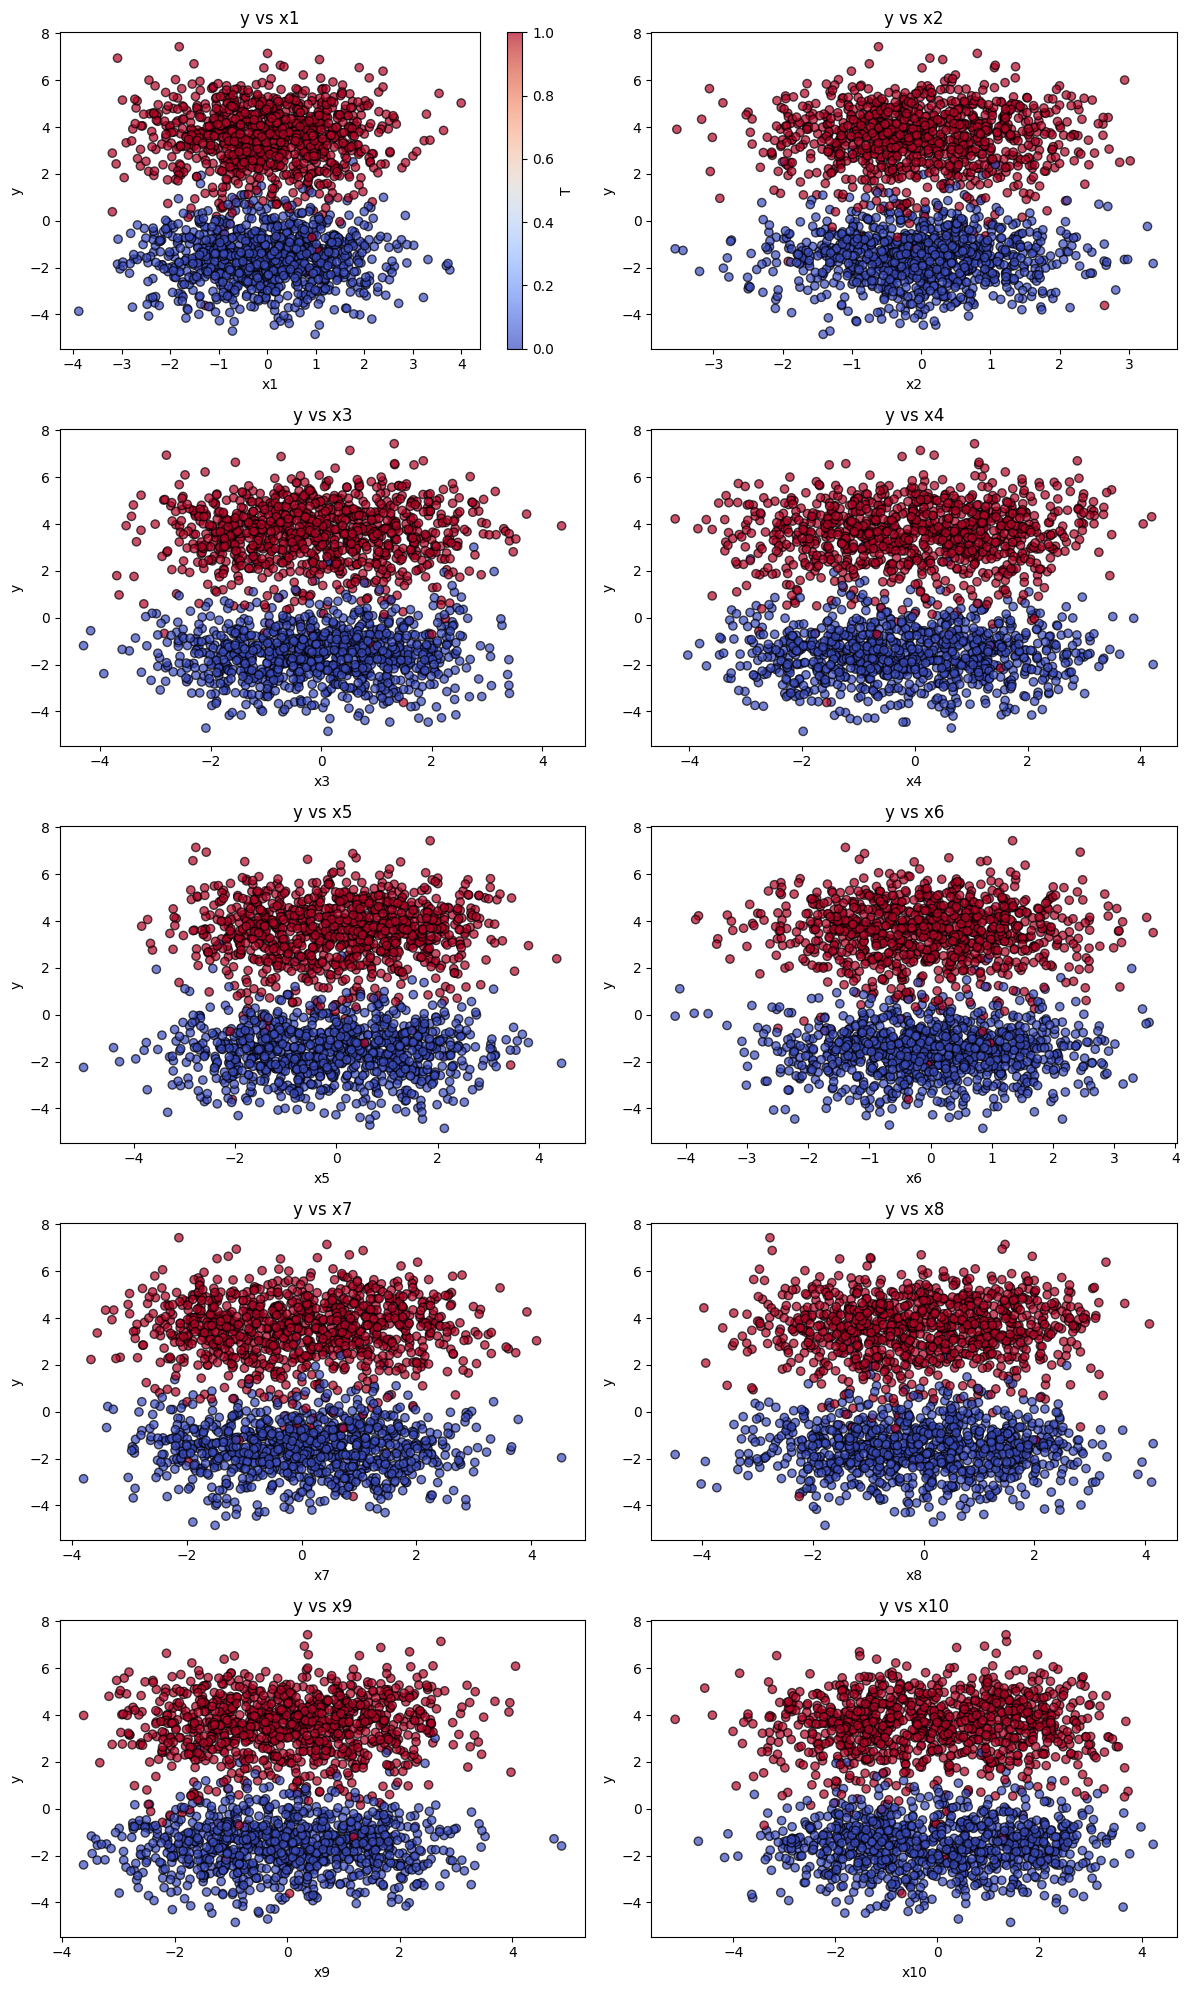

In [42]:
num_proxies = 10

non_linear_dataset = synthetic_dataset_non_linear(
    n = 2000,
    beta = 4.0,
    num_proxies = 10,
    shuffle_pct = 1.0,
    prior_type = "bimodal",
    sigma_x = 1.0,
    sigma_y = 1.0,
    rho = 0.0,   
    seed = 0,
)

x = non_linear_dataset['x']
y = non_linear_dataset['y']
t = non_linear_dataset['t']
z = non_linear_dataset['z']
ite = non_linear_dataset['ite']

# Set up the grid for subplots
ncols = 2
nrows = int(np.ceil(num_proxies / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))
axes = axes.flatten()

# Create scatterplots for each proxy
for i in range(num_proxies):
    ax = axes[i]
    scatter = ax.scatter(x[:, i].numpy(), y.numpy(), c=t.numpy(), cmap='coolwarm', alpha=0.7, edgecolor='k')
    ax.set_xlabel(f'x{i+1}')
    ax.set_ylabel('y')
    ax.set_title(f'y vs x{i+1}')
    if i == 0:  # Add colorbar to the first plot
        cbar = fig.colorbar(scatter, ax=ax, orientation='vertical')
        cbar.set_label('T')

# Hide any unused subplots
for i in range(num_proxies, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()